In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [50]:
#loading the heart dataset to a pandas Dataframe
heart_dataset = pd.read_csv("/content/drive/MyDrive/ML Projects/Heart Failure Prediction/heart.csv")

In [51]:
heart_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [52]:
heart_dataset.shape

(918, 12)

In [53]:
heart_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [54]:
heart_dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [55]:
heart_dataset['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [56]:
heart_dataset.groupby('HeartDisease').mean()

<ipython-input-56-409f7db7c19d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  heart_dataset.groupby('HeartDisease').mean()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


In [57]:
heart_dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [58]:
# Remove duplicate records
heart_dataset1 = heart_dataset.drop_duplicates()

In [85]:
heart_dataset1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [60]:
# Check for missing values and their data types
missing_info = heart_dataset1.isnull().sum()
print("Missing Values:")
print(missing_info)

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [61]:
heart_dataset1 = heart_dataset1.dropna()

Encoding

In [62]:
#ordinal encoding

heart_dataset1['ChestPainType'].nunique()

4

In [63]:
heart_dataset1['RestingECG'].nunique()

3

In [83]:
heart_dataset1['Sex'].nunique()

2

In [77]:
labeled_data = heart_dataset1.iloc[:, [1, 8, 10]]

In [78]:
labeled_data.head()

,Sex,ExerciseAngina,ST_Slope
0,M,N,Up
1,F,N,Flat
2,M,N,Up
3,F,Y,Flat
4,M,N,Up


In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(heart_dataset1.iloc[:,[1,10]],  heart_dataset1.iloc[:, [8]], test_size = 0.2)

In [80]:
X_train

,Sex,ST_Slope
46,M,Up
623,M,Flat
474,M,Up
8,M,Flat
269,F,Flat
...,...,...
519,M,Up
262,M,Flat
423,M,Flat
191,M,Up


In [81]:
y_train

,ExerciseAngina
46,N
623,N
474,N
8,Y
269,N
...,...
519,Y
262,Y
423,Y
191,N


In [86]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['M','F'],['Up','Flat','Down']])

In [87]:
oe.fit(X_train)

OrdinalEncoder(categories=[['M', 'F'], ['Up', 'Flat', 'Down']])

In [88]:
X_train = oe.transform(X_train)

In [89]:
X_train

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [90]:
oe.categories_

[array(['M', 'F'], dtype=object), array(['Up', 'Flat', 'Down'], dtype=object)]

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()

In [93]:
le.fit(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [94]:
le.classes_

array(['N', 'Y'], dtype=object)

In [95]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [96]:
y_train

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [107]:
#onehot encoding

heart_dataset_encoded = pd.get_dummies(heart_dataset1,columns=['ChestPainType','RestingECG','Sex','ExerciseAngina','ST_Slope'], drop_first=True)

In [108]:
heart_dataset_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Sex_M,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,1,0,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,1,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,1,0
916,57,130,236,0,174,0.0,1,1,0,0,0,0,0,0,1,0


Outlier remove

<Axes: >

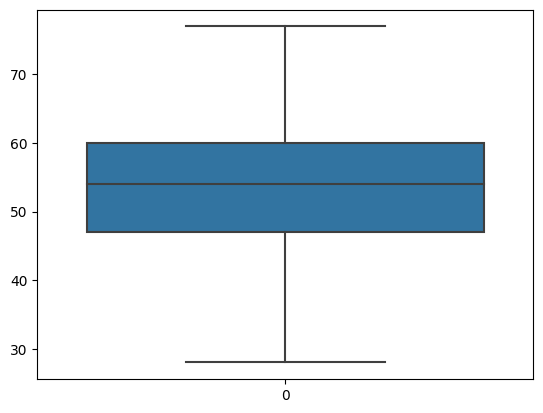

In [110]:
sns.boxplot(heart_dataset_encoded['Age'])

<Axes: >

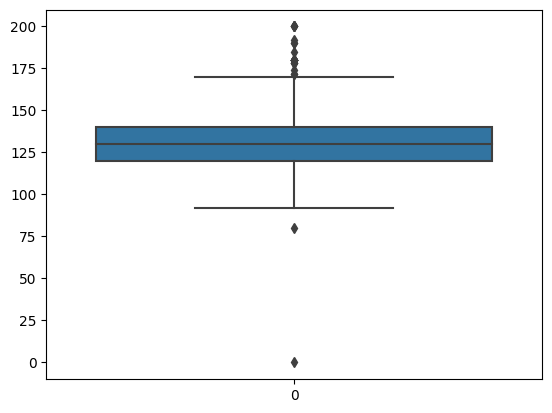

In [111]:
sns.boxplot(heart_dataset_encoded['RestingBP'])

<Axes: >

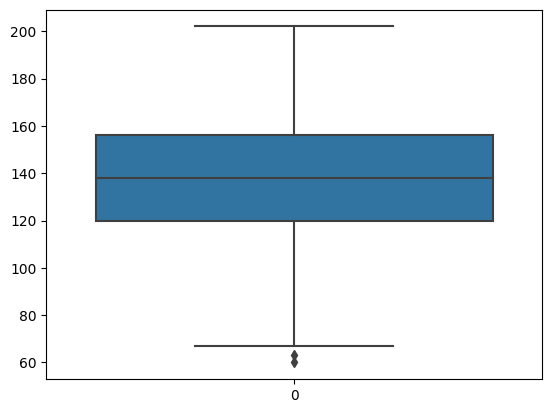

In [112]:
sns.boxplot(heart_dataset_encoded['MaxHR'])

<Axes: >

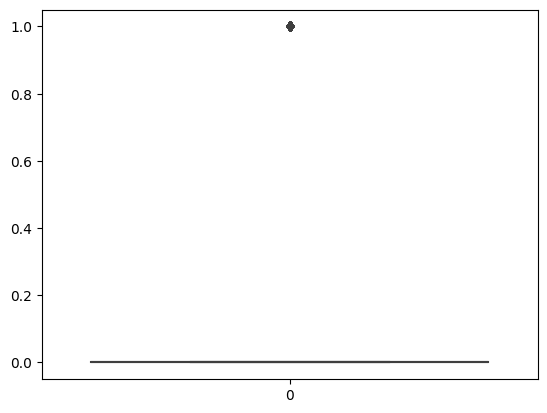

In [113]:
sns.boxplot(heart_dataset_encoded['FastingBS'])

<Axes: >

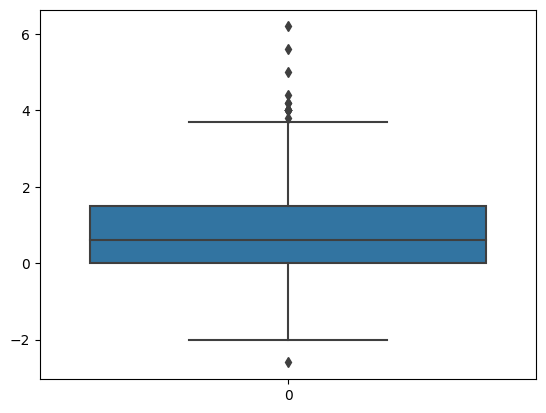

In [114]:
sns.boxplot(heart_dataset_encoded['Oldpeak'])

<Axes: >

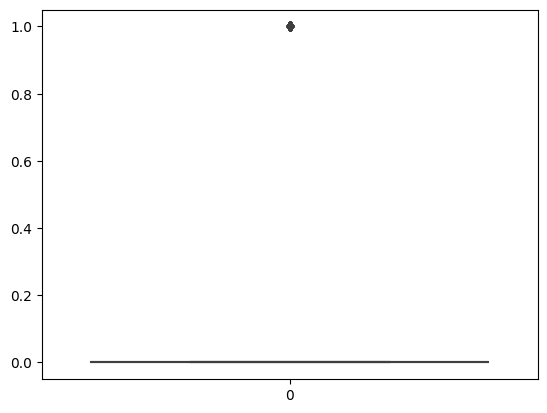

In [115]:
sns.boxplot(heart_dataset_encoded['ChestPainType_ATA'])

<Axes: >

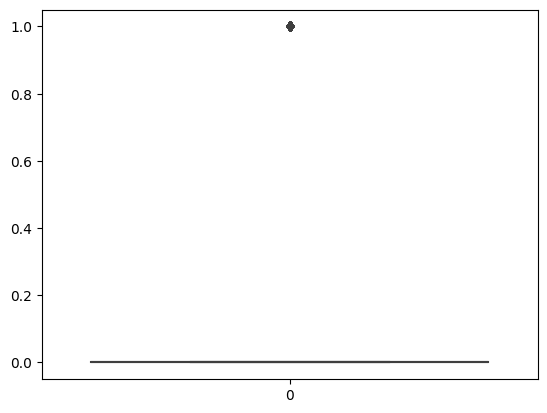

In [116]:
sns.boxplot(heart_dataset_encoded['ChestPainType_NAP'])

<Axes: >

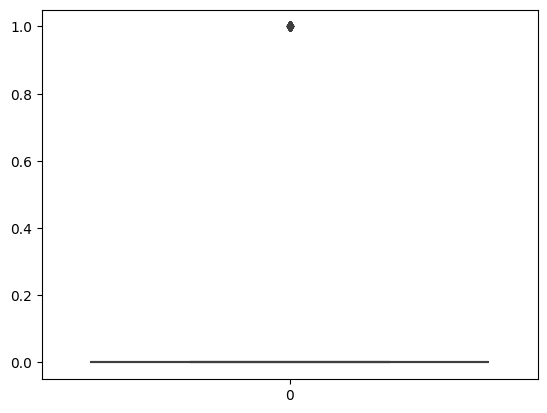

In [117]:
sns.boxplot(heart_dataset_encoded['ChestPainType_TA'])

<Axes: >

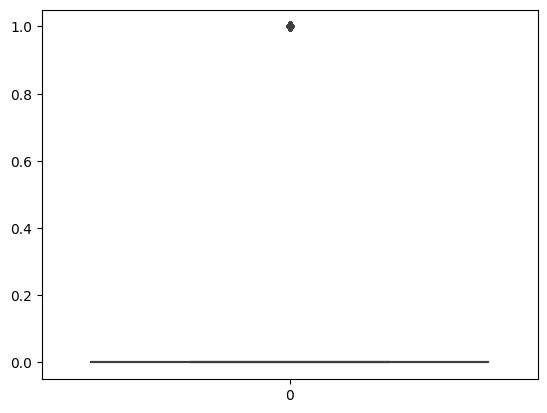

In [118]:
sns.boxplot(heart_dataset_encoded['RestingECG_ST'])

<Axes: >

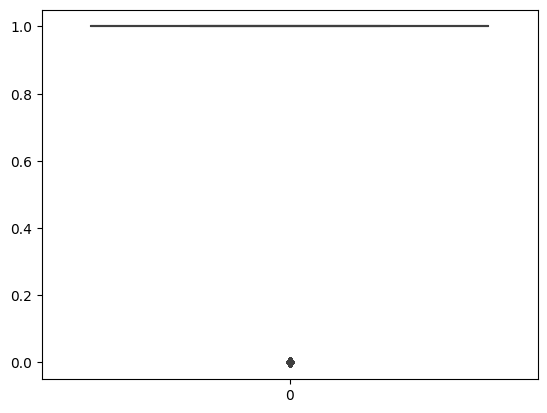

In [119]:
sns.boxplot(heart_dataset_encoded['Sex_M'])

<Axes: >

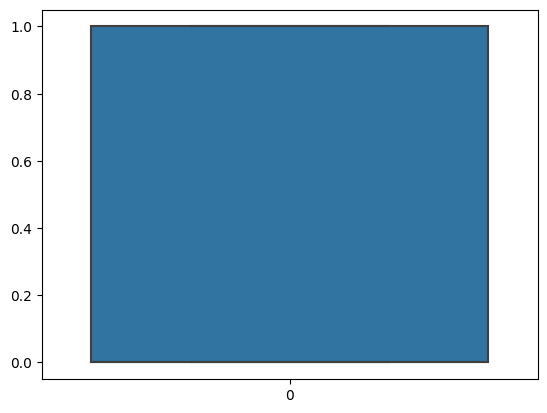

In [121]:
sns.boxplot(heart_dataset_encoded['ExerciseAngina_Y'])

<Axes: >

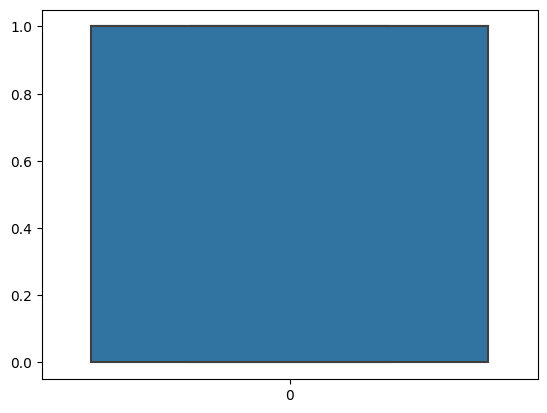

In [122]:
sns.boxplot(heart_dataset_encoded['ST_Slope_Flat'])

<Axes: >

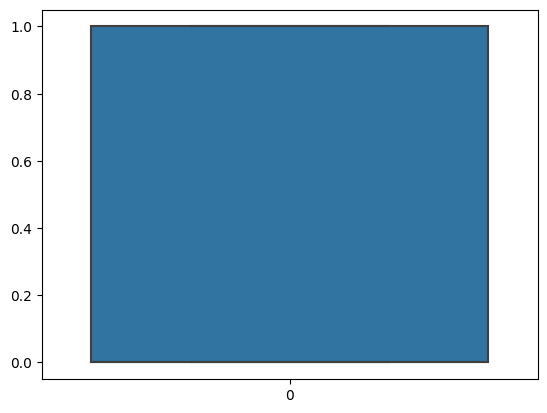

In [123]:
sns.boxplot(heart_dataset_encoded['ST_Slope_Up'])

In [124]:
heart_dataset_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'Sex_M',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [125]:
#remove outliers of RestingBP column

percentile25_bp = heart_dataset_encoded['RestingBP'].quantile(0.25)
percentile75_bp = heart_dataset_encoded['RestingBP'].quantile(0.75)

In [126]:
percentile75_bp

140.0

In [127]:
iqr_bp = percentile75_bp - percentile25_bp

In [128]:
iqr_bp

20.0

In [129]:
upper_limit_bp = percentile75_bp + 1.5 * iqr_bp
lower_limit_bp = percentile25_bp - 1.5 * iqr_bp

In [130]:
print("Upper limit",upper_limit_bp)
print("Lower limit",lower_limit_bp)

Upper limit 170.0
Lower limit 90.0


In [132]:
filter_data_bp = heart_dataset_encoded[(heart_dataset_encoded['RestingBP'] > lower_limit_bp) & (heart_dataset_encoded['RestingBP'] < upper_limit_bp)]

In [133]:
filter_data_bp.shape

(876, 16)

In [135]:
heart_dataset_encoded.shape

(918, 16)

In [136]:
#remove outliers of oldpeak column

percentile25_old = filter_data_bp['Oldpeak'].quantile(0.25)
percentile75_old = filter_data_bp['Oldpeak'].quantile(0.75)

In [137]:
percentile75_old

1.5

In [138]:
iqr_old = percentile75_old - percentile25_old

In [139]:
iqr_old

1.5

In [140]:
upper_limit_old = percentile75_old + 1.5 * iqr_old
lower_limit_old = percentile25_old - 1.5 * iqr_old

In [141]:
print("Upper limit",upper_limit_old)
print("Lower limit",lower_limit_old)

Upper limit 3.75
Lower limit -2.25


In [143]:
filter_data_bp[filter_data_bp['Oldpeak'] > upper_limit_old]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Sex_M,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
68,52,160,246,0,82,4.0,1,0,0,0,0,1,1,1,1,0
166,50,140,231,0,140,5.0,1,0,0,0,0,1,1,1,1,0
500,65,136,248,0,140,4.0,1,0,0,0,1,0,1,1,0,0
521,61,120,282,0,135,4.0,1,0,0,0,0,1,1,1,0,0
537,74,150,258,1,130,4.0,1,0,0,0,0,1,1,1,0,0
559,64,134,273,0,102,4.0,1,0,0,0,1,0,1,1,0,0
624,63,150,407,0,154,4.0,1,0,0,0,0,0,0,0,1,0
771,55,140,217,0,111,5.6,1,0,0,0,1,0,1,1,0,0
775,38,120,231,0,182,3.8,1,0,0,1,1,0,1,1,1,0
791,51,140,298,0,122,4.2,1,0,0,0,1,0,1,1,1,0


In [144]:
filter_data_bp[filter_data_bp['Oldpeak'] < lower_limit_old]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Sex_M,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
324,46,100,0,1,133,-2.6,1,0,0,0,0,1,1,0,1,0


In [145]:
filter_data_old = filter_data_bp[(filter_data_bp['Oldpeak'] > lower_limit_old) & (filter_data_bp['Oldpeak'] < upper_limit_old)]

In [146]:
filter_data_old.shape

(862, 16)

In [147]:
new_dataframe = filter_data_old

In [148]:
new_dataframe

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Sex_M,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,1,0,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,1,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,1,0
916,57,130,236,0,174,0.0,1,1,0,0,0,0,0,0,1,0


In [149]:
new_dataframe.shape

(862, 16)

seperating the Data and Model

In [152]:
#seperating the data and models
X = new_dataframe.drop(columns = "HeartDisease" , axis=1)
Y = new_dataframe["HeartDisease"]

In [153]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Sex_M,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,0,0,1,0,1,0,0,1
1,49,160,180,0,156,1.0,0,1,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,1,0,0,0,1,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,1,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,0,1,1,0,1,0,1,0
914,68,144,193,1,141,3.4,0,0,0,1,0,1,0,1,0
915,57,130,131,0,115,1.2,0,0,0,1,0,1,1,1,0
916,57,130,236,0,174,0.0,1,0,0,0,0,0,0,1,0


In [154]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 862, dtype: int64

Data Standaraization

In [155]:
scaler = StandardScaler()

In [156]:
scaler.fit(X)

StandardScaler()

In [157]:
standardied_data = scaler.transform(X)

In [158]:
standardied_data

array([[-1.40298733,  0.63453018,  0.83634519, ..., -0.79923918,
        -0.99537035,  1.11570232],
       [-0.45155589,  1.95681961, -0.16513727, ..., -0.79923918,
         1.00465119, -0.89629642],
       [-1.72013115, -0.02661453,  0.78121771, ..., -0.79923918,
        -0.99537035,  1.11570232],
       ...,
       [ 0.39416095, -0.02661453, -0.61534498, ...,  1.25118991,
         1.00465119, -0.89629642],
       [ 0.39416095, -0.02661453,  0.34938583, ..., -0.79923918,
         1.00465119, -0.89629642],
       [-1.61441654,  0.50230124, -0.21107683, ..., -0.79923918,
        -0.99537035,  1.11570232]])

In [159]:
X = standardied_data

In [160]:
X

array([[-1.40298733,  0.63453018,  0.83634519, ..., -0.79923918,
        -0.99537035,  1.11570232],
       [-0.45155589,  1.95681961, -0.16513727, ..., -0.79923918,
         1.00465119, -0.89629642],
       [-1.72013115, -0.02661453,  0.78121771, ..., -0.79923918,
        -0.99537035,  1.11570232],
       ...,
       [ 0.39416095, -0.02661453, -0.61534498, ...,  1.25118991,
         1.00465119, -0.89629642],
       [ 0.39416095, -0.02661453,  0.34938583, ..., -0.79923918,
         1.00465119, -0.89629642],
       [-1.61441654,  0.50230124, -0.21107683, ..., -0.79923918,
        -0.99537035,  1.11570232]])

In [161]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 862, dtype: int64

Train Test Split

In [162]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [163]:
print(X.shape, X_train.shape, X_test.shape)

(862, 15) (689, 15) (173, 15)


Training the Model

In [164]:
classifier = svm.SVC(kernel='linear')

In [165]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evalution


Accuracy Score

In [166]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [167]:
print("Accuracy score of the training data : ",training_data_accuracy  )

Accuracy score of the training data :  0.8795355587808418


In [168]:
#accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [169]:
print("Accuracy score of the testing data : ",testing_data_accuracy  )

Accuracy score of the testing data :  0.8728323699421965


Predicting Result from Input Data

In [171]:
input_data = (54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,1)

In [173]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


#standarized the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('This person is not heart failure')
else :
    print('This person is heart failure')

[0]
This person is not heart failure


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
